# Final Project - Jordan Martin

#### Jordan Martin K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.
  
## Breast Cancer Diagnoses

Breast cancer is an issue that has been near and dear to my heart for years. Both my mother and step-mother are breast cancer survivors and I know many other strong women that have been affected by this terrible disease. Thus, for my final project I have chosen to play the role of a data scientist at a hospital who is using 30 different pieces of data from a breast cancer screening to determine whether patients have malignant or benign tumors. For the remainder of this report, I will write from the perspective of a hospital's principal data scientist. I will complete my analyses in a couple different ways, but will use the same dataset. The dataset I am using is built into sklearn. I will discuss it in more detail later.

I will use two methods for determining whether the tumor is malignant or benign in four different ways for a total of eight predictions. My two methods will be supervised and unsupervised machine learning. My supervised method is classification using a decision tree classifier that is trained on 70% of the test cases and then tested on the other 30%. My unsupervised method will be clustering using K-Means and two clusters. The four ways that I will use the data are in its raw form, removing data points that are highly correlated with other data points, standardizing all the data to binary, and removing highly correlated data points along with standardizing the data points to binary.

To simplify decision tree classification, it basically creates a "tree" that asks questions and depending on the answers splits the data into different groups in the hope to split the data up according to a dependent variable. So in our case, we're looking at the thirty input variables and using whether the tumor is malignant or benign as the dependent variable. As stated before, this algorithm uses 70% of the data to "train" or create the model, and then tests it on the remaining 30%. To simplify K-Means clustering, it basically creates a model where we divide all of the individual cases into similar groups based on the means of the individual pieces of data. So in our case, we divide all the cases into two types. We then examine the clusters and see if they align roughly to malignant and benign. It does all of this without actually knowing whether the tumors are malignant or benign.

The purpose of the data transformations is to make the models simpler. Oftentimes, simpler models lead to more straightforward and accurate results. Thus, using less variables, or caring less about magnitude can lead to better models.

### Data Initialization

I looked for data that would be similar to what could be gathered on patients at this hospital. When doing scans, the University of Wisconsin calculated thirty values and then also recorded whether the tumor was malignant or benign. They did this for 569 women suffering from breast tumors. The statistics recorded were radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. They recorded the mean, standard error, and worst for each of these. Then recorded a 0 for a malignant tumor or a 1 for a benign tumor.

#### Notes about this data

There are 212 malignant tumors and 357 benign tumors in this dataset. It was gathered in November, 1995 and has been used in so many machine learning projects that it is now included in scikit's default data. In the below code snippet, I print out the relevant information that the University of Wisconsin has provided.

In [1]:
#Data Initialization
from sklearn.datasets import load_breast_cancer                    #to use scikit's breast cancer dataset
import pandas as pd                                                #to use dataframe objects for processing
data = load_breast_cancer()                                        #load in our breast cancer data
df = pd.DataFrame(data=data['data'],columns=data['feature_names']) #create dataframe from the data
df['Result'] = data['target']                                      #append the result of scan to the data
                                                                   #0=malignant, 1=benign
print(data['DESCR'])                                               #print a brief description including references

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Data Visualization

Before we start building any models or making any predictions, it's always good to actually look at the data we're working with. In the code below, I create histograms that show the percentages of each data point for both malignant and benign tumors that fall within values. Traditionally, a scientist may use graphs like these to make predictions by eye. Below, I examine some of the patterns that I found in the data.

Malignant tumors have the following characteristics in comparison to benign tumors, in general:

- Higher mean and worst radius
- Higher mean and worst texture
- Higher mean and worst perimeter
- Higher mean and worst area
- Higher mean and worst compactness
- Higher mean and worst concavity
- Higher mean and worst concave points

Most of these make sense on their face as worse tumors are usually more aggressive. There are probably a lot of nuiances, though, that make it harder for humans to examine and easier for machine learning algorithms as we'll see below.

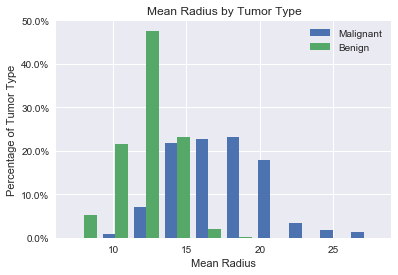

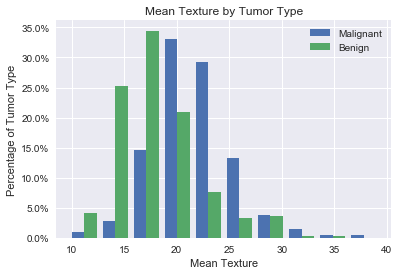

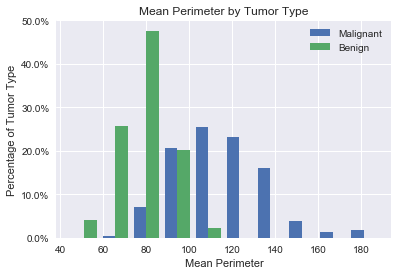

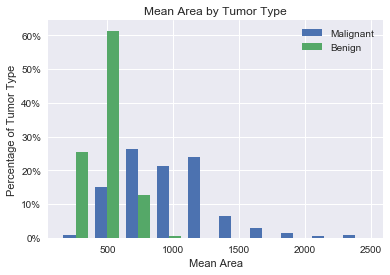

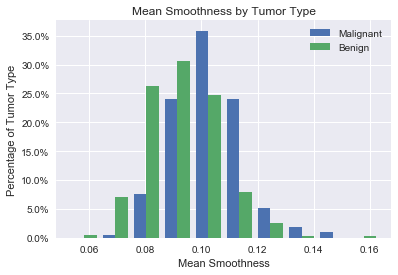

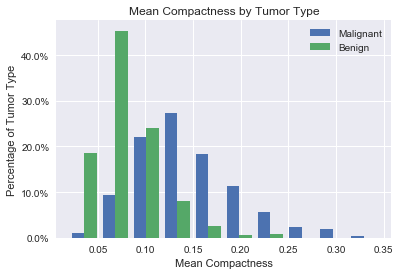

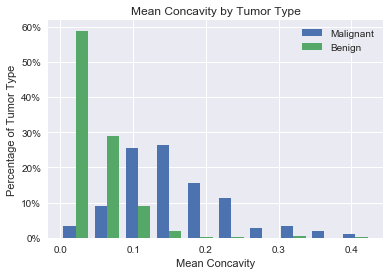

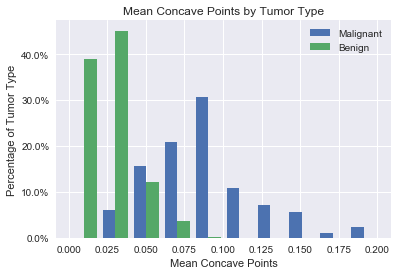

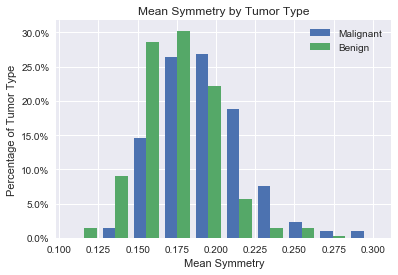

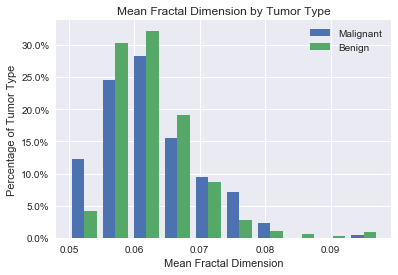

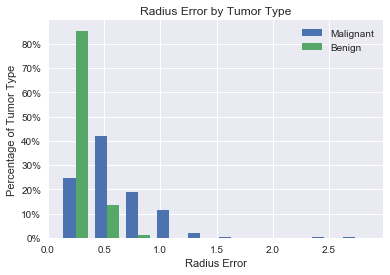

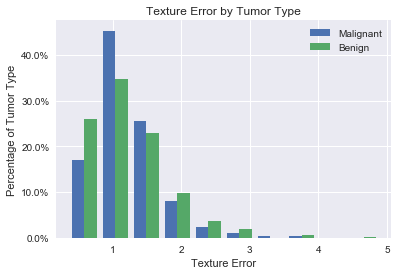

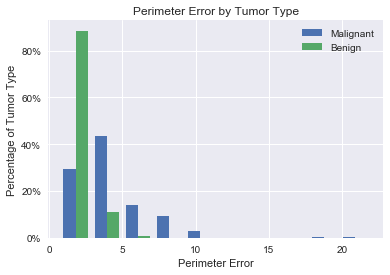

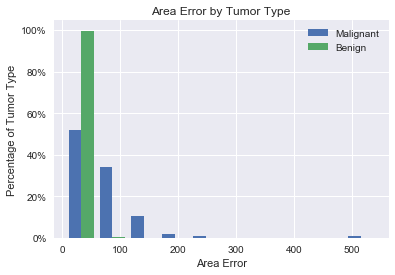

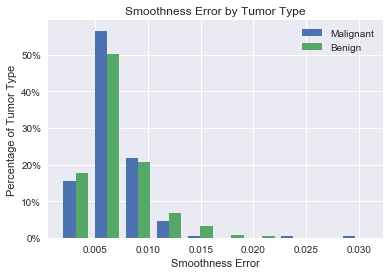

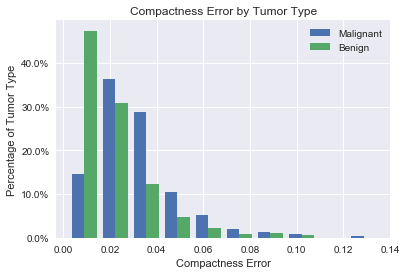

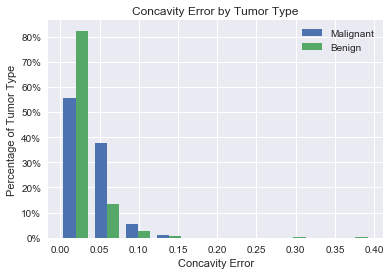

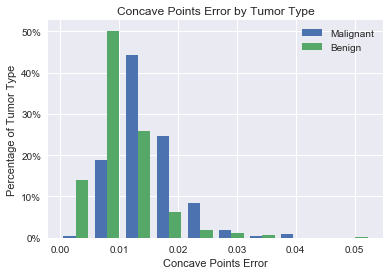

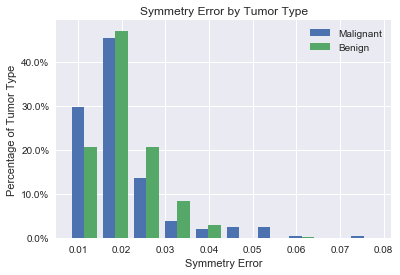

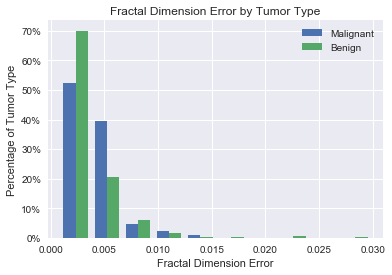

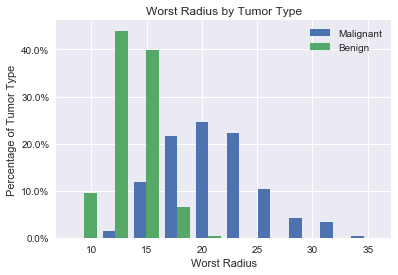

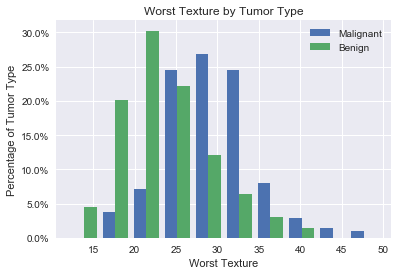

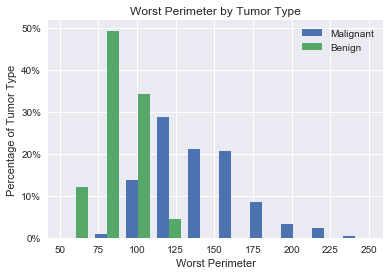

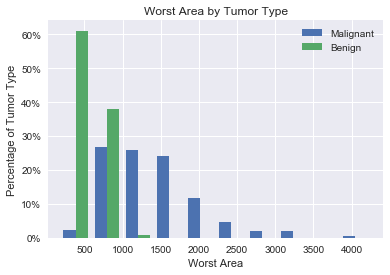

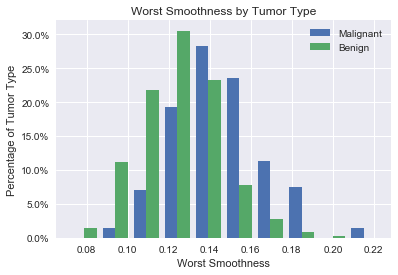

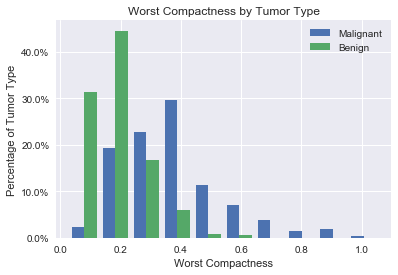

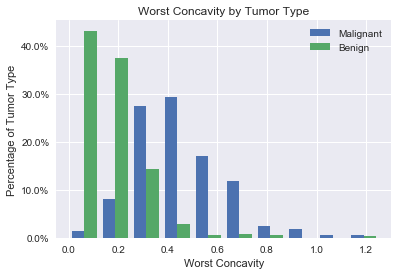

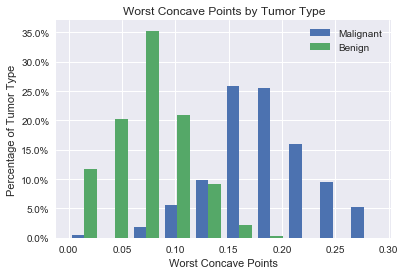

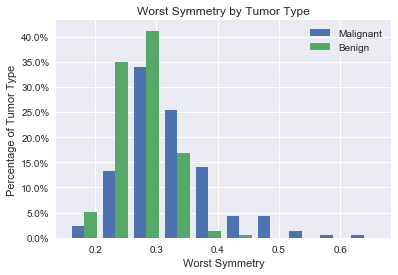

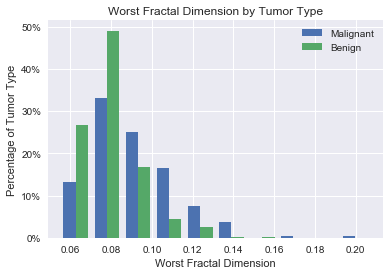

In [3]:
#Data Visualization
import seaborn as sns                                                #for creating the heatmap in the next section
import matplotlib.pyplot as plt                                      #for visualizing data
import numpy as np                                                   #for math-y things
from matplotlib.ticker import PercentFormatter                       #for percentages on graphs
for col in df.columns:  #for each column in our dataframe
    if col != 'Result': #if the column is not our result column
        sns.set(font_scale=1)                                        #set the font size to normal
        x = df.loc[df['Result'] == 0][col]                           #get column's data for malignant tumors
        y = df.loc[df['Result'] == 1][col]                           #get column's data for benign tumors
        plt.hist([x,y], weights=[np.ones(len(x)) / len(x),
            np.ones(len(y)) / len(y)], label=['Malignant','Benign']) #create histogram with data
        plt.legend(loc='upper right')                                #add legend
        plt.title(col.title() + " by Tumor Type")                    #add title
        plt.xlabel(col.title())                                      #add x label
        plt.ylabel('Percentage of Tumor Type')                       #add y label
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))     #set y-axis to be percentages
        plt.show()                                                   #print the plot

### Correlation

Another important set of statistics we will look at before creating the models is the correlation between the variables. The code below creates a matrix that contains all of the correlations between each variable. For example, if a cell has a value of 0.8, then 80% of the value of that variable directly comes from the corresponding variable. Negative values imply negative relationships between the variables. Later on in this report, we will remove the highly correlated variables to simplify our prediction models.

A few of the highest correlated variables, all above 90%:

- mean radius and mean perimeter
- mean radius and mean area
- mean radius and worst radius
- mean radius and worst perimeter
- mean radius and worst area
- mean texture and worst texture
- mean perimeter and mean area
- mean perimeter and worst radius
- mean perimeter and worst perimeter
- mean perimeter and worst area
- mean area and worst radius
- mean area and worst perimeter
- mean area and worst area
- mean compactness and mean concavity
- mean compactness and worst compactness
- mean concavity and mean concave points
- mean concavity and worst concavity
- mean concavity and worst concave points
- mean concave points and worst perimeter
- mean concave points and worst concave points
- perimeter error and area error
- worst perimeter and worst area
- worst compactness and worst concavity
- worst concavity and worst concave points

In [6]:
#Correlation
sns.set(font_scale=3)                                               #make font larger
#divided into two code blocks because sometimes sns doesn't pick up the font size change in time

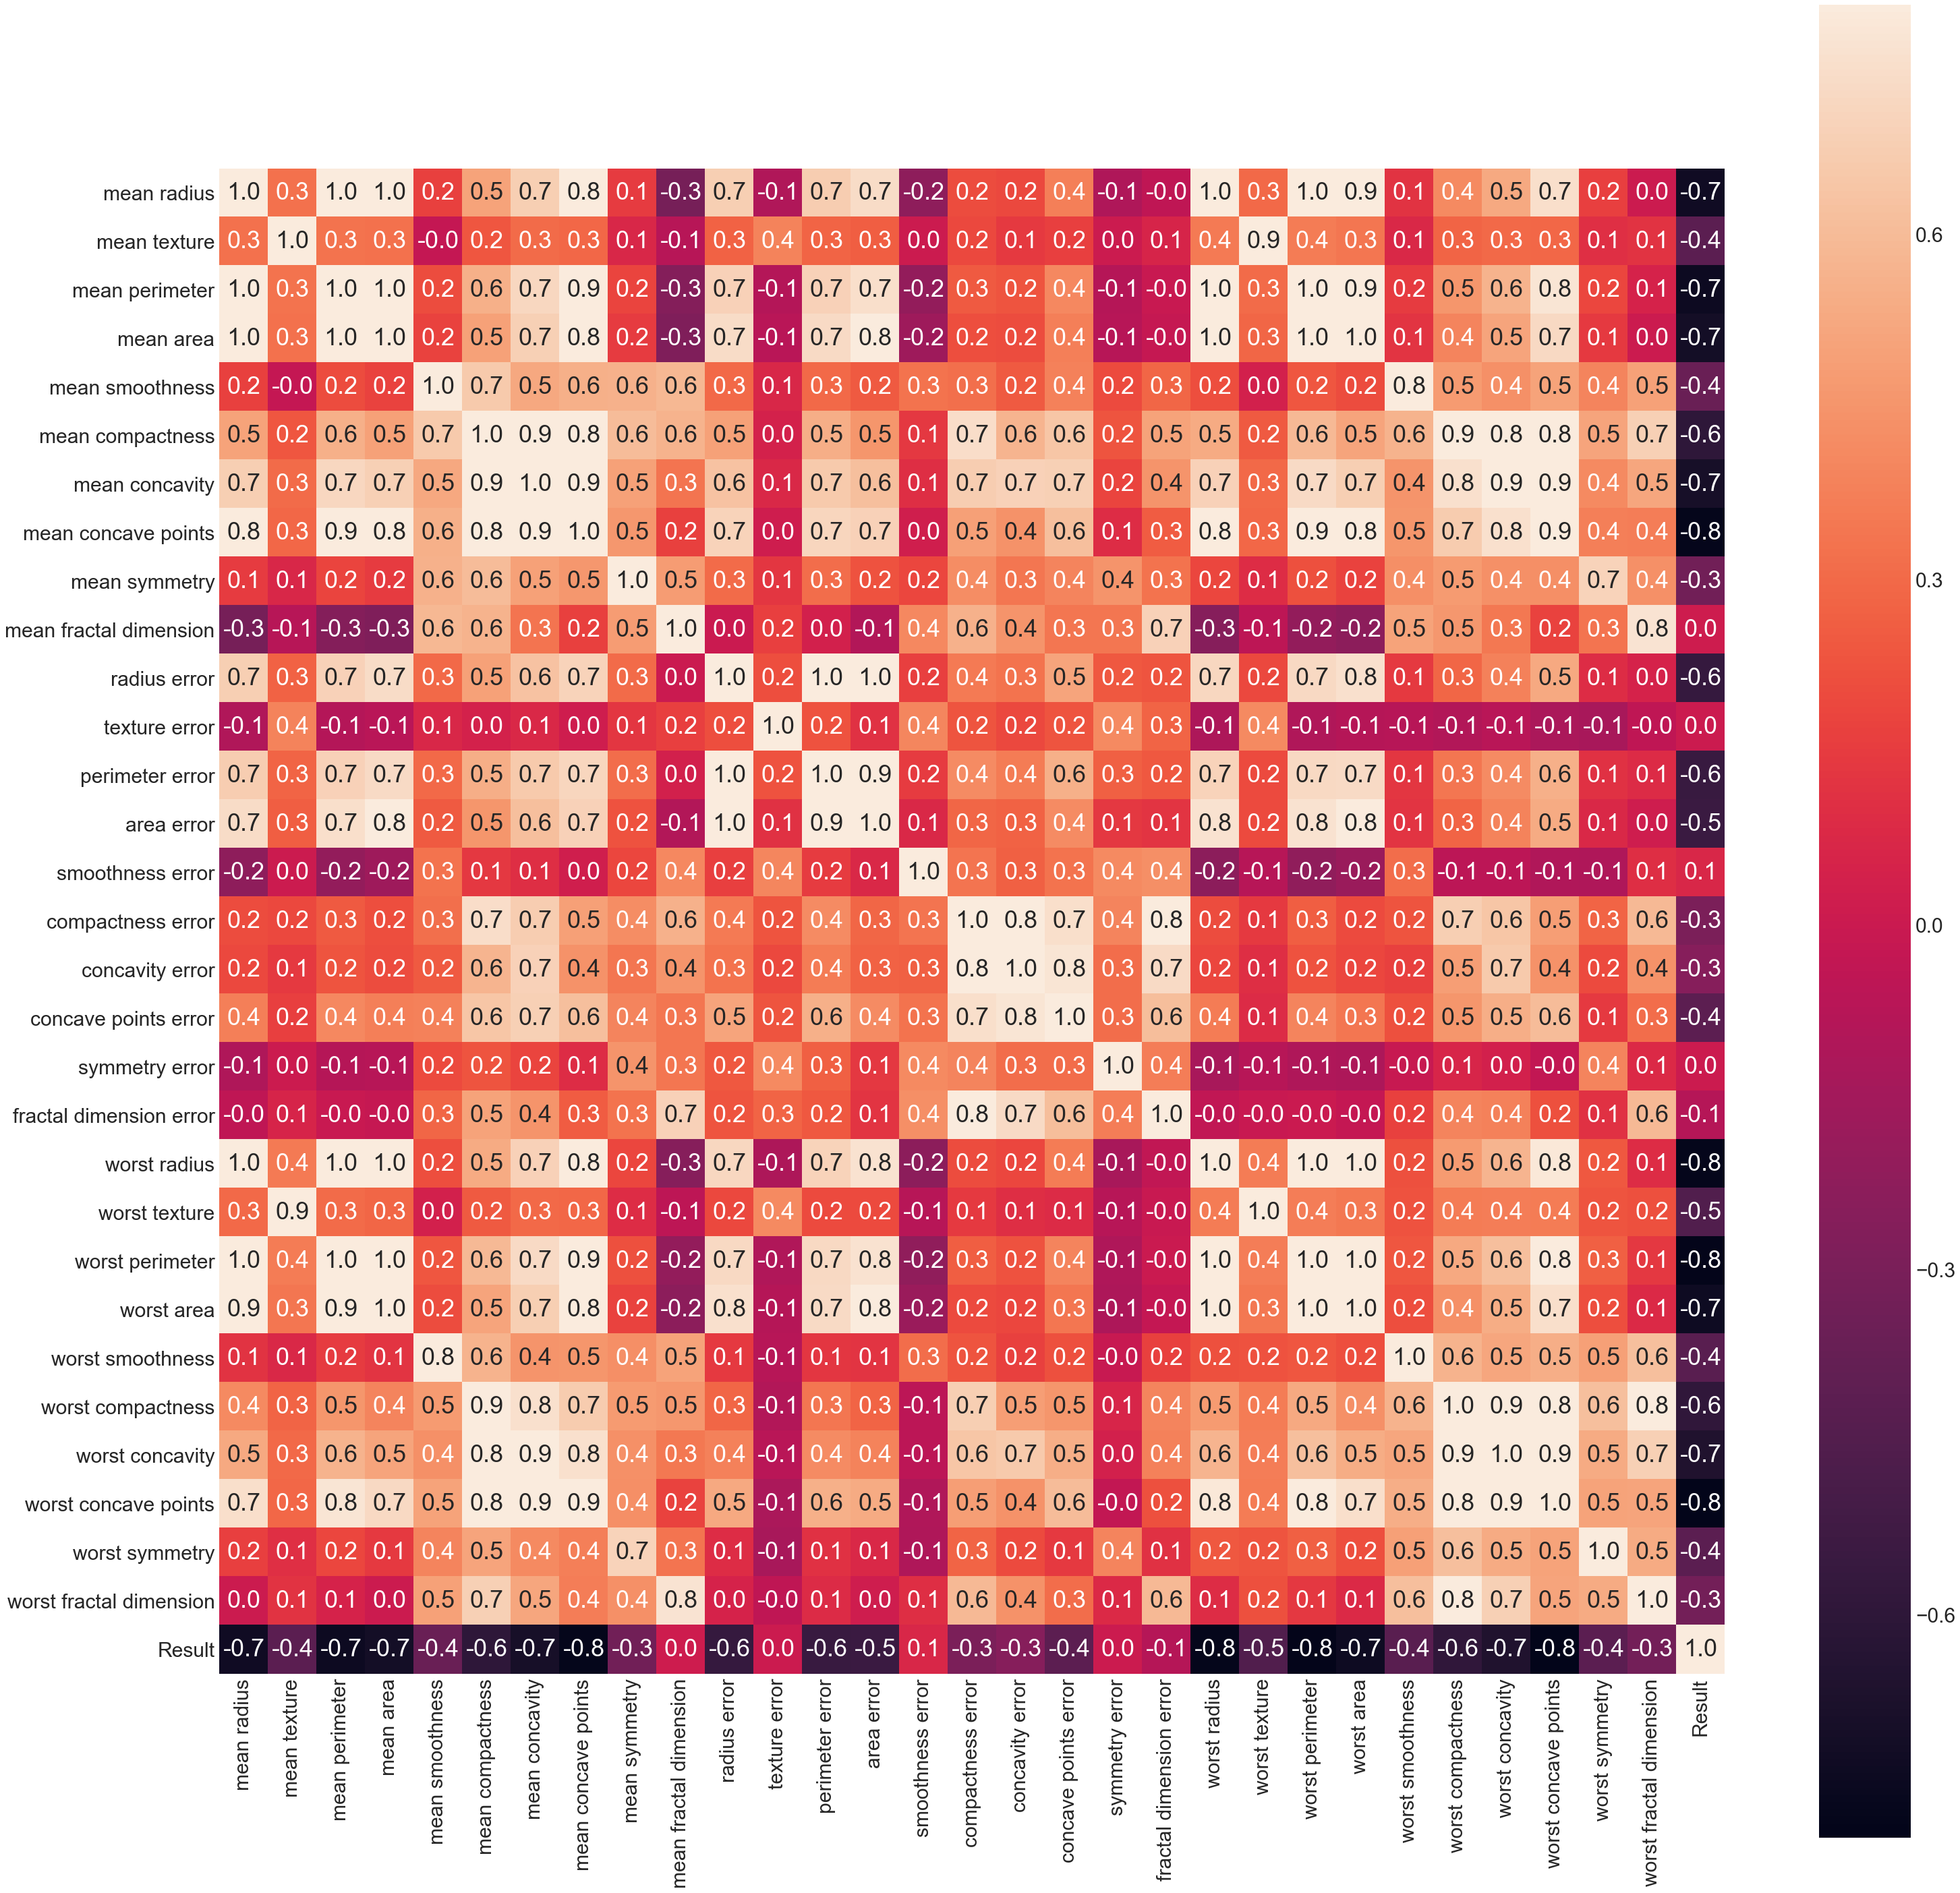

In [7]:
corr = df.corr()                                                    #get correlation coefficients
plt.subplots(figsize=(50,50))                                       #make plot larger for all variables
sns.set(font_scale=3)                                               #make font larger
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f") #print the heatmap

### Classification

As mentioned previously, for classifying our tumor data, we will be using a decision tree classifier. This code will randomly choose 70% of the data to train the model on, and then test it on the remaining 30%. For the purposes of this report, we will not go in depth as to what the decision tree looks like, but we will look at how well the model fared.

This model is 91.8% accurate which sounds really good until we look closer at what that means. Of all of the women that this model looked at, 157 of the 171 test subjects' tumors were correctly classfified. Of those that we labelled as malignant, 60 were actually malignant and 3 were false positives. Of those that we labelled as benign, 97 were actually benign and 11 were false negatives. 11 false negatives is not very good for just 171 subjects. This is because a false negative may cause doctors to not operate on the individual when the really need an operation. This could kill these 11 women.

Finally, the receiver operating characteristic (ROC) is 92.5%. This statistic is calculated by comparing the true positive rate to the false positive rate and is widely regarded as a good statistic to show how a classifier performs. Ours is pretty good, but we'll see how it compares to our clustering analysis and our other analyses after simplifying the data.

In [8]:
#Classification
from sklearn.model_selection import train_test_split                     #for splitting test and train data
from sklearn import tree                                                 #for decision tree
from sklearn.tree import DecisionTreeClassifier                          #for decision tree
from sklearn import metrics                                              #for printing results
sns.set(font_scale=1)                                                    #make font smaller again
#create reusable classification function for later after transformation
def classification(df):
    y = df['Result']                                                     #independent variables
    X = df.drop(['Result'], axis=1)                                      #dependent variable
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)                #splitting data for test and train
    dtc = tree.DecisionTreeClassifier()                                  #initialize decision tree
    dtc.fit(X_train, y_train)                                            #use training data to fit model
    print("-----------------------------------------------------------") #print divider
    print('Accuracy Score: ' + \
          str(metrics.accuracy_score(y_test, dtc.predict(X_test))))      #print accuracy score
    print("-----------------------------------------------------------") #print divider
    confusion_matrix = metrics.confusion_matrix(y_test,
                                                 dtc.predict(X_test))    #get confusion matrix
    totalCorrect = confusion_matrix[0][0] + confusion_matrix[1][1]       #get total correct predictions
    totalFalse = confusion_matrix[0][1] + confusion_matrix[1][0]         #get total false predictions
    totalTest = totalCorrect + totalFalse                                #get total test predictions
    correctPositives = confusion_matrix[0][0]                            #get total correct positives
    falsePositives = confusion_matrix[0][1]                              #get false correct positives
    correctNegatives = confusion_matrix[1][1]                            #get total correct negatives
    falseNegatives = confusion_matrix[1][0]                              #get total false negatives
    print('Correct Overall:  ' + str(totalCorrect) + '/' \
          + str(totalTest) + ' = ' + \
          str((totalCorrect/totalTest)*100)[:5] + '%')                   #print overall results
    print('Correct Positive: ' + str(correctPositives) + '/' + \
          str(correctPositives+falsePositives) + '   = ' + \
          str((correctPositives/(correctPositives + \
          falsePositives))*100)[:5] + '%')                               #print positive test results
    print('Correct Negative: ' + str(correctNegatives) + '/' + \
          str(correctNegatives+falseNegatives) + '  = ' + \
          str((correctNegatives/(correctNegatives + \
          falseNegatives))*100)[:5] + '%')                               #print negative test results
    print("-----------------------------------------------------------") #print divider
    print("Classification Report:")                                      #print header for classification report
    print(metrics.classification_report(y_test, dtc.predict(X_test)))    #print classification report
    print("-----------------------------------------------------------") #print divider
    print('Receiver Operating Characteristic Score: ' + \
          str(metrics.roc_auc_score(y_test, dtc.predict(X_test))))       #print receiver operating characteristic
    print("-----------------------------------------------------------") #print divider
classification(df)                                                       #run classification on the data

-----------------------------------------------------------
Accuracy Score: 0.9181286549707602
-----------------------------------------------------------
Correct Overall:  157/171 = 91.81%
Correct Positive: 60/63   = 95.23%
Correct Negative: 97/108  = 89.81%
-----------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.95      0.90        63
          1       0.97      0.90      0.93       108

avg / total       0.92      0.92      0.92       171

-----------------------------------------------------------
Receiver Operating Characteristic Score: 0.9252645502645502
-----------------------------------------------------------


### Clustering Analysis

As mentioned previously, for clustering analysis, we are using K-Means clustering. In the following code, we create two clusters of similar data points. After completing this analysis, the "0" cluster actually mapped to benign and the "1" cluster mapped to malignant, thus I had to flip the binary result to get the proper statistics. Out of the 569 cases, the clustering algorithm properly identified 486 or 85.41%. For those marked positive, 130 out of 131 were correct while those marked negative were 356 out 438. While it may seem good that we are so accurate at labelling those with malignant tumors, it's actually pretty scary when you look closer. In this model, we have about 80 false negatives which means that if we relied on this model alone, about 80 women would think they were in the clear when they really are not.

In [16]:
#Clustering Analysis
from sklearn.cluster import KMeans                                              #for creating clusters
#create reusable clustering function for use later
def clustering(df,flip):
    kmeans = KMeans(n_clusters=2,random_state=0).fit(df.drop(columns='Result')) #create clusters without results
    df1 = pd.DataFrame(kmeans.labels_, columns = ['cluster'])                   #new dataframe with clusters
    #initialize variables for analysis
    totalCorrect = 0
    totalFalse = 0
    correctPositives = 0
    falsePositives = 0
    correctNegatives = 0
    falseNegatives = 0
    if(flip):
        df1 = df1.replace({0:1, 1:0})
    #loop through each of the rows of the data
    for i in range(569): #note that the clusters have opposite value of our Result variable
        #correct positive result
        if df1['cluster'][i]==0 and df['Result'][i]==0:
            correctPositives = correctPositives + 1
            totalCorrect = totalCorrect + 1
        #false positive results
        elif df1['cluster'][i]==1 and df['Result'][i]==0:
            falseNegatives = falseNegatives + 1
            totalFalse = totalFalse + 1
        #correct negative result
        elif df1['cluster'][i]==1 and df['Result'][i]==1:
            correctNegatives = correctNegatives + 1
            totalCorrect = totalCorrect + 1
        #false negative result
        else:
            falsePositives = falsePositives + 1
            totalFalse = totalFalse + 1
    #print the results
    print('Correct Overall:  ' + str(totalCorrect) + '/569 = ' + \
          str((totalCorrect/569)*100)[:5] + '%')
    print('Correct Positive: ' + str(correctPositives) + '/' + \
          str(correctPositives+falsePositives) + ' = ' + \
          str((correctPositives/(correctPositives+falsePositives))*100)[:5] + '%')
    print('Correct Negative: ' + str(correctNegatives) + '/' + \
          str(correctNegatives+falseNegatives) + ' = ' + \
          str((correctNegatives/(correctNegatives+falseNegatives))*100)[:5] + '%')
clustering(df,True) #run the clustering for the data, flpping the clusters as explained

Correct Overall:  486/569 = 85.41%
Correct Positive: 130/131 = 99.23%
Correct Negative: 356/438 = 81.27%


### Data Transformation

#### First Transformation

As discussed previously, we will be tranforming the data in three separate ways and doing the same analyses on the transformed data. Our first transformation is dropping the redundant variables. In this case, I defined redundant as variables that are accounted for at least 90% by another variable.

The classification for this model improved slightly overall, dropping slightly for positive results, and increasing significantly for negative results. The ROC, on the other hand, was almost exactly the same. Thus, we cannot really say that this transformation was useful for classifying the cancer data.

The clustering algorithm for this transformed data was significantly worse than with the original data for positive results, significantly better for negative results, and thus netted about the same result as the original. In this case, I think it's safe to say that this hurts our original results as the original only had a single false positive while this one had 56.

In [17]:
#Data Transformation 1
drop = [] #initialize drop list
#for each variable
for a in corr:
    #if the variable is not in the drop list, loop through others, if it is, we skip
    if a not in drop:
        for b in corr:
            #if we're not on the diagonal, not dealing with the result and the correlation is very large
            if a!=b and b!='Result' and (corr[a][b] > 0.9 or corr[a][b] < -0.9) and b not in drop:
                drop.append(b) #add to our drop list
df2 = df.drop(drop, axis=1) #create new dataframe, dropping the redundant columns
classification(df2)   #run classification on the winnowed data
clustering(df2,False) #run clustering on the winnowed data 

-----------------------------------------------------------
Accuracy Score: 0.9181286549707602
-----------------------------------------------------------
Correct Overall:  157/171 = 91.81%
Correct Positive: 57/63   = 90.47%
Correct Negative: 100/108  = 92.59%
-----------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.90      0.89        63
          1       0.94      0.93      0.93       108

avg / total       0.92      0.92      0.92       171

-----------------------------------------------------------
Receiver Operating Characteristic Score: 0.9153439153439153
-----------------------------------------------------------
Correct Overall:  474/569 = 83.30%
Correct Positive: 173/229 = 75.54%
Correct Negative: 301/340 = 88.52%


#### Second Transformation

For this transformation, we change all of the data to binary data. 0 for data that is less than average and 1 for data that is greater than average.

For the new data, almost all of results for classification were nearly the same as the original data. The clustering, on the other hand, was significantly better for negative results, a little worse for positive results, so overall significantly better. Of course we now have 26 false positives, but only 28 false negatives.

In [18]:
#Data Transformation 2
means = df.mean(axis=0).to_numpy() #get the means of each column
arr = df.to_numpy() #convert the dataframe to a numpy array for easier manipulation
for i in range(len(arr)): #iterate through rows
    for j in range(len(arr[i])): #iterate through columns
        #if the entry is greater than the column average, assign 1, else assign 0
        if arr[i][j] > means[j]:
            arr[i][j] = 1
        else:
            arr[i][j] = 0
df3 = pd.DataFrame(data=arr, columns=df.columns) #convert numpy array back into dataframe for processing
classification(df3)   #run classification on the binary data
clustering(df3,True)  #run clustering on the binary data, flipping the clusters for the same reason as before

-----------------------------------------------------------
Accuracy Score: 0.9415204678362573
-----------------------------------------------------------
Correct Overall:  161/171 = 94.15%
Correct Positive: 61/63   = 96.82%
Correct Negative: 100/108  = 92.59%
-----------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        63
        1.0       0.98      0.93      0.95       108

avg / total       0.94      0.94      0.94       171

-----------------------------------------------------------
Receiver Operating Characteristic Score: 0.9470899470899471
-----------------------------------------------------------
Correct Overall:  525/569 = 92.26%
Correct Positive: 194/220 = 88.18%
Correct Negative: 331/349 = 94.84%


#### Third Transformation

As mentioned previously, our last transformation is a combination of the previous two. We are using the binary data, but also dropping the columns that are redundant.

This data is not particularly interesting as it is worse for both of the models and only improves on the original by having less false positives in the clustering model, which all of our transformations achieved. In the conclusion, I will go into more detail about which of these models I think our hospital should use.

In [19]:
#Data Transformation 3
df4 = df3.drop(drop,axis=1) #drop redundant columns from binary data
classification(df4)         #run classification on the binary data with redundant columns dropped
clustering(df4,True)        #run clustering on the binary data with redundant columns dropped

-----------------------------------------------------------
Accuracy Score: 0.8947368421052632
-----------------------------------------------------------
Correct Overall:  153/171 = 89.47%
Correct Positive: 56/63   = 88.88%
Correct Negative: 97/108  = 89.81%
-----------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

        0.0       0.84      0.89      0.86        63
        1.0       0.93      0.90      0.92       108

avg / total       0.90      0.89      0.90       171

-----------------------------------------------------------
Receiver Operating Characteristic Score: 0.8935185185185185
-----------------------------------------------------------
Correct Overall:  475/569 = 83.47%
Correct Positive: 179/240 = 74.58%
Correct Negative: 296/329 = 89.96%


### Conclusion

There a lot of different ways we can decide to utilize our breast cancer data to diagnose our patients. My suggestion is that we should first use the clustering analysis on the original data to weed out women that are almost certainly at risk. Out of 131 cases that we marked as malignant, only one wasn't. This means that we can quickly find many women that almost certainly need operations.

Unfortunately none of our models were particularly fantastic at marking women for benign tumors. Our best option is to use the binary data clustering analysis which was about 95% accurate at finding women that really had benign tumors. While not perfect, it can help doctors significantly.

Overall, combining these two models, we can make sure that a large majority of women with malignant tumors definitely get the care they need, then provide doctors a 95% confidence that the remaining women don't have dangerous cancer. While this doesn't replace the need for a doctor, it can help them check their work and could save some live that could fall through the cracks.